In [1]:
# requiment library and packages
import numpy as np
import pandas as pd

In [2]:
# data sets
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
rating = pd.read_csv('Ratings.csv')

/var/folders/5f/0hb_qs091gb66mrrdykchhyw0000gn/T/ipykernel_43087/2636606482.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
# shape of data
print(books.shape)
print(users.shape)
print(rating.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [4]:
# view data
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
94895,0394411285,Matters of Fact and of Fiction: Essays 1973-1976,Gore Vidal,1977,Random House Inc,http://images.amazon.com/images/P/0394411285.0...,http://images.amazon.com/images/P/0394411285.0...,http://images.amazon.com/images/P/0394411285.0...
121406,0425174115,The Day the Music Died (Sam McCain Mysteries),Edward Gorman,2000,Prime Crime,http://images.amazon.com/images/P/0425174115.0...,http://images.amazon.com/images/P/0425174115.0...,http://images.amazon.com/images/P/0425174115.0...
227074,3351022158,Narrenweisheit oder Tod und VerklÃ?Â¤rung des ...,Lion Feuchtwanger,1995,Aufbau-Verlag,http://images.amazon.com/images/P/3351022158.0...,http://images.amazon.com/images/P/3351022158.0...,http://images.amazon.com/images/P/3351022158.0...
92642,0684846195,The GOOD BROTHER: A Memoir of Coming Home,Chris Offutt,1998,Simon &amp; Schuster,http://images.amazon.com/images/P/0684846195.0...,http://images.amazon.com/images/P/0684846195.0...,http://images.amazon.com/images/P/0684846195.0...
90138,0553486594,"Who's Mandie? (Young Mandie Mystery, No 1)",Lois Gladys Leppard,1999,Skylark Books,http://images.amazon.com/images/P/0553486594.0...,http://images.amazon.com/images/P/0553486594.0...,http://images.amazon.com/images/P/0553486594.0...


In [5]:
users.sample(5)

,User-ID,Location,Age
119806,119807,"kuopio, \n/a\"", finland""",NaN
182706,182707,"tarragona, tarragona, spain",17.0
136877,136878,"tashkent, samarkand, uzbekistan",23.0
138504,138505,"córdoba, córdoba, argentina",14.0
79000,79001,"mason, michigan, usa",NaN


In [6]:
rating.sample(5)

,User-ID,ISBN,Book-Rating
281730,67034,0440236851,0
391690,94787,0446313645,0
189554,41757,0812521463,0
745667,180415,0373222939,0
562810,135265,0373196547,0


In [7]:
# check missing values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
# duplicates value in data sets
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
rating.duplicated().sum()

0

In [13]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [14]:
books['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: count, Length: 102022, dtype: int64

In [15]:
books['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: count, Length: 16807, dtype: int64

In [16]:
rating['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [17]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

### Perform EDA

In [18]:
# requiment packages
import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


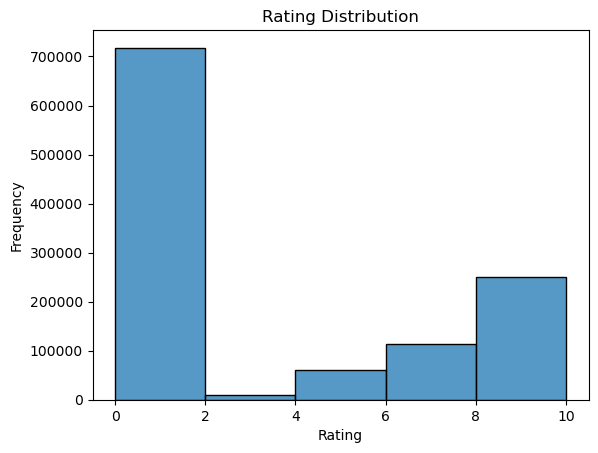

In [19]:
# Rating distribution
sns.histplot(rating['Book-Rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Analyze Relationships Between Datasets
df = rating.merge(books, on='ISBN').merge(users, on='User-ID')
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


In [21]:
top_books = df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print(top_books)

Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
Joan Miro: 1893-1983 (Basic Series)                                                                                                       10.0
The Vampire's Apprentice                                                                                                           

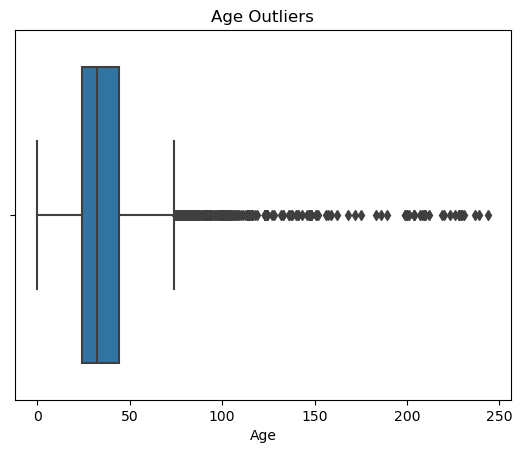

In [22]:
sns.boxplot(x=users['Age'])
plt.title("Age Outliers")
plt.show()

# Handle outliers
users = users[(users['Age'] > 5) & (users['Age'] < 100)]

### Apply PB system

In [23]:
# merge books with rating dataset for easy to get or look data
books_with_rating = rating.merge(books, on='ISBN')
books_with_rating.shape

(1031136, 10)

In [25]:
books_with_rating.sample(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
599055,168464,0307021599,0,"Daniel in the lions' den: Daniel 1-2,4-6 (A Li...",Pamela Broughton,1987,Western Pub. Co,http://images.amazon.com/images/P/0307021599.0...,http://images.amazon.com/images/P/0307021599.0...,http://images.amazon.com/images/P/0307021599.0...
547232,169027,0764227270,10,Not a Sparrow Falls,Linda Nichols,2002,Bethany House Publishers,http://images.amazon.com/images/P/0764227270.0...,http://images.amazon.com/images/P/0764227270.0...,http://images.amazon.com/images/P/0764227270.0...
965520,184220,0973546905,9,Cupid Only Misses Sometimes,Bryan Acker,2004,Bryan Acker,http://images.amazon.com/images/P/0973546905.0...,http://images.amazon.com/images/P/0973546905.0...,http://images.amazon.com/images/P/0973546905.0...


In [26]:
# lets find out number of rating book higher book rating top of 250 yah etc
no_rating = books_with_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()
no_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [41]:
# remane column name
no_rating.rename(columns={'Book-Rating': 'No-Ratings'}, inplace=True)
no_rating

,Book-Title,No-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [42]:
# avg rating
avg_rating = books_with_rating.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating': 'Avg-Ratings'}, inplace=True)
avg_rating

TypeError: agg function failed [how->mean,dtype->object]

In [43]:
books_with_rating['Book-Rating'].dtype

dtype('int8')

In [44]:
books_with_rating['Book-Rating'] = pd.to_numeric(books_with_rating['Book-Rating'], errors='coerce')

In [45]:
books_with_rating['Book-Rating'].isnull().sum()

0

In [46]:
avg_rating = books_with_rating.groupby('Book-Title').mean()['Book-Rating'].reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [47]:
books_with_rating['Book-Rating'].dtype

dtype('int8')

In [48]:
print(books_with_rating['Book-Rating'].min())
print(books_with_rating['Book-Rating'].max())

0
10


In [49]:
books_with_rating['Book-Rating'] = books_with_rating['Book-Rating'].astype('int8')

In [50]:
books_with_rating['Book-Rating'].dtype

dtype('int8')

In [51]:
avg_rating = books_with_rating.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating': 'Avg-Ratings'}, inplace=True)
print(avg_rating)

TypeError: agg function failed [how->mean,dtype->object]

In [37]:
# Step 1: Calculate the average ratings for each book
avg_rating = books_with_rating.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename the column for clarity
avg_rating.rename(columns={'Book-Rating': 'Avg-Rating'}, inplace=True)

avg_rating

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [52]:
popular_df = no_rating.merge(avg_rating, on='Book-Title')
popular_df

,Book-Title,No-Ratings,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [53]:
popular_df['No-Ratings'] >= 250

0         False
1         False
2         False
3         False
4         False
          ...  
241066    False
241067    False
241068    False
241069    False
241070    False
Name: No-Ratings, Length: 241071, dtype: bool

In [51]:
# more than 250 ratinted books
popular_df[popular_df['No-Ratings'] >= 250]

,Book-Title,No-Ratings,Avg-Rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [54]:
popular_df[popular_df['No-Ratings'] >= 250].sort_values('Avg-Rating', ascending=False)

,Book-Title,No-Ratings,Avg-Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [55]:
# top 50 books
popular_df = popular_df[popular_df['No-Ratings'] >= 250].sort_values('Avg-Rating', ascending=False).head(50)

In [58]:
popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Image-URL-M', 'Image-URL-L', 'No-Ratings', 'Avg-Rating']]

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,Image-URL-L,No-Ratings,Avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [59]:
top50_books = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Image-URL-M', 'Image-URL-L', 'No-Ratings', 'Avg-Rating']].head(50)

In [61]:
top50_books.head(1)['Image-URL-L']

0    http://images.amazon.com/images/P/0439136350.0...
Name: Image-URL-L, dtype: object

In [62]:
top50_books.shape

(50, 7)

In [63]:
top50_books.columns

Index(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Image-URL-M',
       'Image-URL-L', 'No-Ratings', 'Avg-Rating'],
      dtype='object')

In [64]:
popular_df.columns

Index(['Book-Title', 'No-Ratings', 'Avg-Rating'], dtype='object')

### Collaborative filtering based recommender system

In [65]:
books_with_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [66]:
rating_users_over200 = books_with_rating.groupby('User-ID').count()['Book-Rating'] > 200
users_rading_index = rating_users_over200[rating_users_over200].index

In [67]:
filtered_rating = books_with_rating[books_with_rating['User-ID'].isin(users_rading_index)]

In [68]:
books_rating_over50 = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = books_rating_over50[books_rating_over50].index

In [69]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [70]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [71]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [72]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [73]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [74]:
pt.fillna(0, inplace=True)

In [75]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [78]:
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [79]:
similarity_scores.shape

(706, 706)

In [ ]:
def book_image(book_name):
    

In [80]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index == book_name)[0][0]
    # distances = similarity_scores[index]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key = lambda x: x[1], reverse=True)[1:6]
    for books in similar_items:
        print(pt.index[books[0]])

In [81]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [142]:
import pickle
pickle.dump(popular_df, open('popular.pkl', 'wb'))

In [90]:
top50_books

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,No-Ratings,Avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [91]:
import pickle
pickle.dump(top50_books, open('top50books.pkl', 'wb'))

In [96]:
def recommend(book_name):
    # Fetch the index of the book
    try:
        index = np.where(pt.index == book_name)[0][0]
    except IndexError:
        return []  # Return an empty list if the book is not found

    # Get similarity scores and sort them
    similar_items = sorted(
        list(enumerate(similarity_scores[index])), 
        key=lambda x: x[1], 
        reverse=True
    )[1:6]  # Skip the first item as it is the book itself

    # Collect details of the recommended books
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]  # Use i[0] for the index of the book
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    
    return data

In [97]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [98]:
# export data set for recommendation function use
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))

In [114]:
books.sample(5)[['Book-Title', 'Publisher']].reset_index()

,index,Book-Title,Publisher
0,137133,My little book of bugs (A Golden tell-a-tale b...,Western Pub. Co
1,53110,Karen's Kittycat Club (Baby-Sitters Little Sis...,Scholastic
2,149271,Solitaire,Warner Books
3,39854,Gute Knochen.,Btb Bei Goldmann
4,193142,50 Greatest Letters from America's Wars,Crown Publishers
